#### What is the Bias-Variance Tradeoff?
In essence, the bias-variance tradeoff describes the relationship between two sources of error that prevent supervised learning algorithms from generalizing beyond their training set:

**Bias**: Bias refers to the error introduced by approximating a real-world problem, which may be complex, by a simplified model. High bias means the model makes strong assumptions about the data, leading it to consistently miss the true relationship. An oversimplified model has high bias.           
**Variance**: Variance refers to the error introduced by the model's sensitivity to small fluctuations in the training set. A model with high variance learns the training data too well, including its noise, and thus performs poorly on unseen data. A complex model that fits the training data very closely tends to have high variance.

###### Total Error ≈ Bias² + Variance + Irreducible Error

### Diagnosing Overfitting: The Performance Gap

**Overfitting** occurs when a model performs very well on training data but poorly on unseen data.

#### Signs of Overfitting
- **High Training Performance, Low Validation/Test Performance**
  - Classification:
    - Training Accuracy = 99%
    - Test Accuracy = 70%
  - Regression:
    - Training R² = 0.98
    - Test R² = 0.50
- **Large gap between training and validation errors**

#### How to Identify Overfitting

1. **Split the Data**
   - Training set → train the model  
   - Validation set → tune hyperparameters  
   - Test set → final evaluation  

2. **Train the Model**
   - Fit the model on training data

3. **Evaluate Performance**
   - Calculate metrics on training and validation sets

4. **Compare Metrics**
   - If  
     **Training Metric >> Validation Metric**  
     OR  
     **Training Error << Validation Error**  
     → **Overfitting detected**


#### Key Takeaway
A large performance gap between training and validation results indicates overfitting.


### Diagnosing Underfitting: Consistently Poor Performance

**Underfitting** occurs when a model is too simple and fails to learn the underlying patterns in the data.

#### Signs of Underfitting
- **Low Training Performance, Low Validation/Test Performance**
  - Classification:
    - Training Accuracy = 60%
    - Test Accuracy = 60%
  - Regression:
    - Training R² = 0.30
    - Test R² = 0.30
- **Small gap between training and validation errors**
  - Errors are high but close to each other

#### How to Identify Underfitting

1. **Split the Data**
   - Training, Validation, and Test sets

2. **Train the Model**
   - Fit the model on training data

3. **Evaluate Performance**
   - Calculate metrics on training and validation sets

4. **Compare Metrics**
   - If  
     **Training Metric is Low AND Validation Metric is Low**  
     OR  
     **Training Error is High AND Validation Error is High**  
     → **Underfitting detected**

#### Example Scenario (Regression)

**Task:** Predict house prices using square footage

- Training MSE = 500,000
- Validation MSE = 520,000

**Observation:** Error is high on both sets and the gap is small.

**Conclusion:** The model is too simple and fails to capture the true relationship → **Underfitting**

#### Key Takeaway
When both training and validation performance are poor and similar, the model is underfitting.


## Analyzing Learning Curves to Identify Overfitting/Underfitting

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples=1000,n_features=20,n_informative=10,n_redundant=5,random_state=42)
model = LogisticRegression(max_iter=1000)
train_size = np.linspace(0.1,1.0,10)
train_sizes,train_scores,val_scores = learning_curve(
    model,X,y,cv=5, train_sizes=train_size, scoring='accuracy', n_jobs=-1
)

In [10]:
train_scores_mean = np.mean(train_scores,axis=1)
train_scores_std = np.std(train_scores,axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

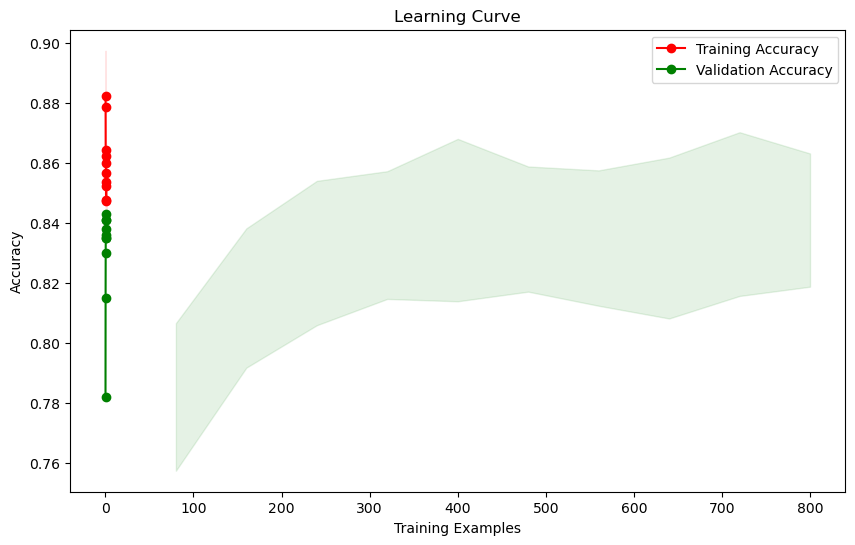

In [14]:
# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.fill_between(train_size,train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes,val_scores_mean - val_scores_std,val_scores_mean + val_scores_std,alpha=0.1,color='g')
plt.plot(train_size,train_scores_mean,'o-',color='r',label='Training Accuracy')
plt.plot(train_size,val_scores_mean,'o-',color='g',label='Validation Accuracy')
plt.legend(loc='best')
plt.show()

## Strategies to Combat Overfitting

## 1. More Data: The Ultimate Solution (Often)
### 🔹 Concept
Increasing the size of the training dataset helps reduce overfitting.  
With more data, the model sees a wider variety of examples, making it harder to memorize noise and easier to learn true patterns.

### 🔹 Why It’s Important
- Addresses the root cause of overfitting: **limited data**
- Provides a better representation of the real data distribution
- Improves model generalization

### 🔹 How to Implement
- **Collect More Real-World Data**
  - Best solution but often expensive and time-consuming
- **Data Augmentation**
  - Create new samples from existing data
  - Examples:
    - Images: rotation, flipping, zooming, color changes
    - Text: synonym replacement, paraphrasing
    - Audio: noise addition, pitch shifting

## 2. Regularization: Penalizing Complexity

### 🔹 Concept
Regularization adds a **penalty term** to the loss function that discourages overly complex models by limiting large weights.

### 🔹 Why It’s Important
- Controls model complexity without changing architecture
- Prevents large coefficients that cause overfitting
- Helps the model focus on important patterns

---

### 🔹 Types of Regularization

**L1 Regularization (Lasso)**
- Penalty: sum of |w|
- Encourages sparsity
- Can make some coefficients exactly zero
- Performs feature selection

**L2 Regularization (Ridge)**
- Penalty: sum of w²
- Shrinks coefficients toward zero
- Keeps all features but reduces their impact

**Elastic Net**
- Combination of L1 and L2
- Balances sparsity and stability

In [15]:
from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_regression, make_classification

In [18]:
# Example for Ridge Regression (L2)
X_reg, y_reg = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

# alpha controls regularization strength. Higher alpha = stronger regularization
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_reg, y_reg)

# Example for Lasso Regression (L1)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_reg, y_reg)

Lasso()

In [19]:
# Example for Logistic Regression with L2 regularization (controlled by C)
X_clf, y_clf = make_classification(n_samples=100, n_features=10, random_state=42)
# C is the inverse of regularization strength. Lower C = stronger regularization
log_reg_model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
log_reg_model.fit(X_clf, y_clf)

# Example for SVM with L2 regularization (controlled by C)
svm_model = SVC(C=1.0, kernel='rbf') # C is inverse regularization strength
svm_model.fit(X_clf, y_clf)

SVC()

## 3. Dropout (For Neural Networks)

### 🔹 Concept
Dropout is a regularization technique used in neural networks where a fraction of neurons is randomly deactivated during training.  
This forces the network to learn robust features and prevents reliance on specific neurons.

### 🔹 Why It’s Important
- Prevents co-adaptation of neurons
- Reduces overfitting
- Acts like training multiple smaller networks together

### 🔹 How to Implement
- Use **Dropout layers** in deep learning frameworks:
  - TensorFlow / Keras
  - PyTorch

## 4. Early Stopping

### 🔹 Concept
Early stopping monitors validation performance during training and stops training when validation performance starts to worsen, even if training performance keeps improving.

### 🔹 Why It’s Important
- Prevents the model from over-training
- Stops learning before overfitting begins
- Saves computational resources

### 🔹 How It Works
- Track validation loss or accuracy
- Stop training when validation loss increases for several epochs

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1, warm_start=True, random_state=42) # max_iter=1 to train one epoch at a time

best_accuracy = 0
best_model_weights = None
num_epochs = 100

print("Training with Early Stopping...")
for epoch in range(num_epochs):
    model.fit(X_train, y_train) # Train for one epoch
    
    # Evaluate on validation set
    y_pred_val = model.predict(X_val)
    current_accuracy = accuracy_score(y_val, y_pred_val)
    
    # Store best weights if current performance is better
    if current_accuracy > best_accuracy:
        best_accuracy = current_accuracy
        best_model_weights = model.get_params() # In a real scenario, you'd save model state
        print(f"Epoch {epoch+1}: New best validation accuracy = {best_accuracy:.4f}")
    else:
        # If validation accuracy starts decreasing, stop training
        print(f"Epoch {epoch+1}: Validation accuracy decreased ({current_accuracy:.4f} < {best_accuracy:.4f}). Stopping early.")
        break

print(f"Training finished. Best validation accuracy: {best_accuracy:.4f}")

Training with Early Stopping...
Epoch 1: New best validation accuracy = 0.4850
Epoch 2: New best validation accuracy = 0.5550
Epoch 3: New best validation accuracy = 0.6800
Epoch 4: New best validation accuracy = 0.7600
Epoch 5: New best validation accuracy = 0.8000
Epoch 6: New best validation accuracy = 0.8350
Epoch 7: New best validation accuracy = 0.8400
Epoch 8: New best validation accuracy = 0.8550
Epoch 9: New best validation accuracy = 0.8650
Epoch 10: New best validation accuracy = 0.8850
Epoch 11: New best validation accuracy = 0.8900
Epoch 12: New best validation accuracy = 0.8950
Epoch 13: Validation accuracy decreased (0.8950 < 0.8950). Stopping early.
Training finished. Best validation accuracy: 0.8950


C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\envs\ml_ds_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ASUS\anaconda3\

## Strategies to Combat Underfitting

## 1. Increase Model Complexity

### 🔹 Concept
Underfitting can be reduced by using a more complex model that can learn non-linear and intricate patterns in data.

### 🔹 Why It’s Important
Simple models have **high bias** and make strong assumptions that may not hold true.  
Complex models relax these assumptions and fit data better.

### 🔹 How to Implement

**For Linear Models**
- Increase degree of polynomial features
- Add interaction terms
- Switch to non-linear models (SVM with RBF/poly kernel, Decision Trees, Neural Networks)

**For Tree-Based Models**
- Increase maximum depth
- Decrease minimum samples per split
- Increase number of trees (Random Forest, Gradient Boosting)

**For Neural Networks**
- Increase number of hidden layers (deeper network)
- Increase neurons per layer (wider network)
---

## 2. Feature Engineering: Creating Better Features

### 🔹 Concept
Feature engineering creates or transforms features to make patterns easier for the model to learn.

### 🔹 Why It’s Important
Raw features may not clearly represent relationships.  
Better features reduce model bias.

### 🔹 How to Implement
- Polynomial features (x², x³)
- Interaction terms (x₁ × x₂)
- Log / exponential transformations
- Binning continuous variables
- Encoding categorical variables (One-hot, Label, Target)
- Extracting information:
  - Date → day, month, year
  - Text → TF-IDF, embeddings
---

## 3. Reduce Regularization Strength

### 🔹 Concept
Too much regularization can oversimplify the model, causing underfitting.

### 🔹 Why It’s Important
Proper balance between bias and variance is required.

### 🔹 How to Implement
- Reduce **alpha** in Ridge/Lasso
- Increase **C** in Logistic Regression / SVM
- Reduce **dropout rate** in neural networks
---

## 4. Train for More Epochs (Iterative Models)

### 🔹 Concept
Underfitting may occur if training stops too early.

### 🔹 Why It’s Important
Model needs sufficient time to learn patterns.

### 🔹 How to Implement
- Increase number of epochs/iterations
- Monitor learning curves to avoid overfitting
---

## 5. Use Different Algorithms

### 🔹 Concept
The chosen algorithm may not suit the data structure.

### 🔹 Why It’s Important
Different algorithms capture different patterns (linear vs non-linear).

### 🔹 How to Implement
- Replace linear models with:
  - Tree-based models
  - SVM with non-linear kernel
  - Neural networks

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Increase Model Complexity
# Assume X_train, X_val, y_train, y_val are already split and features engineered

# Initialize and train a more complex model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

Random Forest Accuracy: 0.9150


### What is Model Complexity?
Model complexity is not a single, universally defined metric but rather a characteristic that varies across different types of algorithms. It generally relates to:

**Number of Parameters**: Models with more parameters (weights, coefficients, nodes) have a higher capacity to fit complex functions. For example, a deep neural network with millions of parameters is far more complex than a simple linear regression model with a few coefficients.                    
**Flexibility of the Model**: How easily can the model adapt its shape or decision boundary to the data? A linear model is rigid, while a high-degree polynomial or a decision tree can be very flexible.                                                                                                   
**Non-linearity**: Models that can capture non-linear relationships are generally considered more complex than purely linear models.                  

#### How to Manage Model Complexity:
1. **Algorithm Choice**: Select algorithms that are inherently suited to the expected complexity of the problem. For simple, linear relationships, a linear model might suffice. For complex, non-linear data, a more powerful algorithm like a neural network or gradient boosting might be necessary.

2. **Hyperparameter Tuning**: Most algorithms have hyperparameters that control their complexity. Tuning these hyperparameters is crucial:
    - Polynomial Regression: Adjust the degree of the polynomial.
    - Decision Trees: Adjust max_depth, min_samples_split, min_samples_leaf.
    - SVMs: Adjust C and gamma (for RBF kernel).
    - Neural Networks: Adjust the number of layers, neurons per layer, activation functions.
    - Regularized Models: Adjust the regularization strength (alpha or C).
This tuning is typically performed using techniques like grid search or random search with cross-validation.

3. **Feature Engineering**: Adding relevant features can sometimes allow a simpler model to perform well. Conversely, removing irrelevant features can help a complex model focus on the important signals.

4. **Regularization**: As discussed, regularization techniques (L1, L2, dropout) are explicit methods to control complexity and prevent overfitting.

5. **Ensemble Methods**: Combining multiple models, especially those with moderate complexity, can lead to a more robust overall model with a better balance of bias and variance.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

In [28]:
np.random.seed(42)
X_data = np.sort(np.random.rand(100, 1) * 10, axis=0)
y_data = np.sin(X_data).flatten() + np.random.normal(0, 0.3, 100)

# Define different polynomial degrees to test complexity
degrees = [1, 3, 10] # Low, Medium, High complexity

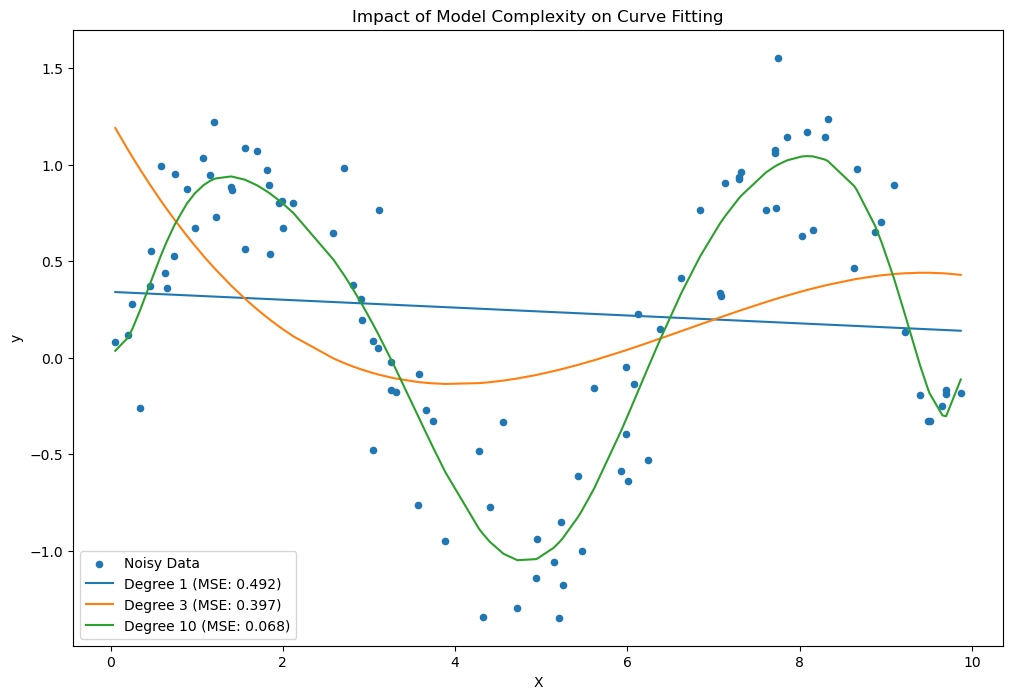

In [31]:
plt.figure(figsize=(12, 8))

# Plot the original data
plt.scatter(X_data, y_data, s=20, label='Noisy Data')

# Plot models of different complexities
for degree in degrees:
    # Create a pipeline: Polynomial Features -> Linear Regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_data, y_data)
    y_pred = model.predict(X_data)
    mse = mean_squared_error(y_data, y_pred)
    
    plt.plot(X_data, y_pred, label=f'Degree {degree} (MSE: {mse:.3f})')

plt.title('Impact of Model Complexity on Curve Fitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [32]:
# Interpretation:
# Degree 1 (Linear): Likely high bias, underfitting.
# Degree 3: Might capture the sine wave well, good balance.
# Degree 10: Likely high variance, overfitting, fitting the noise.